In [1]:
# increase cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import gc
import time
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shapefile as shp
import geopandas as gpd
import s2_py as s2
from shapely.geometry import Polygon, mapping, box

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
ca_df = gpd.read_file("../Data/Processed/CA_S2Cells/CA_S2Cells.shp")
ca_df = ca_df.to_crs({'init': 'epsg:4326'})
ca_df.rename(columns={'S2_Cells_I': 'S2_Cells_ID'}, inplace=True)
ca_df.shape

(10643, 9)

In [15]:
ca_wf = pd.read_csv('../Data/Processed/WildFire_S2Cells.csv')
ca_wf.shape

(3673, 46)

In [5]:
def bin_probs(probs):
    perc = {
        'low': 10,
        'low-med': 30,
        'med-high': 70,
        'high': 90} 
    perc_cuts = {}
    for p in perc:
        perc_cuts[p] = np.percentile(probs, perc[p])
    
    conditions = [
        (probs <= perc_cuts['low']),
        ((probs > perc_cuts['low']) & (probs <= perc_cuts['low-med'])),
        ((probs > perc_cuts['low-med']) & (probs <= perc_cuts['med-high'])),
        ((probs > perc_cuts['med-high']) & (probs <= perc_cuts['high'])),
        (probs > perc_cuts['high'])
    ]
    choices = ['1. low', '2. low-med', '3. med-high', '4. high', '5. extreme']
    
    return np.select(conditions, choices)

In [6]:
gc.collect()

7

In [18]:
def read_probs(probs_path, probs_name, bin_name):
    probs = pd.read_csv(probs_path)
    probs.columns = ['S2_Cells_ID', 'Date', probs_name]
    probs[bin_name] = bin_probs(probs[probs_name])
    print(probs.shape)
    print(probs[bin_name].value_counts())
    print(probs.groupby(bin_name)[probs_name].min())
    print(probs.groupby(bin_name)[probs_name].max())
    return probs

In [19]:
noprecip_cwEQ_ext_new_probs = read_probs('./Models/mlp_adam_noprecip_cwEQ_ext_new_probs.csv', 
                                         'noprecip_cwEQ_ext_new_probs', 
                                         'noprecip_cwEQ_ext_new_bins')

(3884695, 4)
3. med-high    1553878
2. low-med      776939
4. high         776938
1. low          388470
5. extreme      388470
Name: noprecip_cwEQ_ext_new_bins, dtype: int64
noprecip_cwEQ_ext_new_bins
1. low         0.000000
2. low-med     0.171522
3. med-high    0.384022
4. high        0.592524
5. extreme     0.694626
Name: noprecip_cwEQ_ext_new_probs, dtype: float64
noprecip_cwEQ_ext_new_bins
1. low         0.171521
2. low-med     0.384022
3. med-high    0.592524
4. high        0.694626
5. extreme     1.000000
Name: noprecip_cwEQ_ext_new_probs, dtype: float64


In [23]:
precip50_cwEQ_ext_new_probs = read_probs('./Models/mlp_adam_precip50_cwEQ_ext_new_probs.csv', 
                                         'precip50_cwEQ_ext_new_probs', 
                                         'precip50_cwEQ_ext_new_bins')

(3884695, 4)
3. med-high    1553879
2. low-med      776939
4. high         776937
1. low          388470
5. extreme      388470
Name: precip50_cwEQ_ext_new_bins, dtype: int64
precip50_cwEQ_ext_new_bins
1. low         0.000000
2. low-med     0.129268
3. med-high    0.334558
4. high        0.594370
5. extreme     0.729599
Name: precip50_cwEQ_ext_new_probs, dtype: float64
precip50_cwEQ_ext_new_bins
1. low         0.129267
2. low-med     0.334558
3. med-high    0.594369
4. high        0.729599
5. extreme     1.000000
Name: precip50_cwEQ_ext_new_probs, dtype: float64


In [24]:
precip70_cwEQ_ext_new_probs = read_probs('./Models/mlp_adam_precip70_cwEQ_ext_new_probs.csv', 
                                         'precip70_cwEQ_ext_new_probs', 
                                         'precip70_cwEQ_ext_new_bins')

(3884695, 4)
3. med-high    1553877
4. high         776939
2. low-med      776938
1. low          388471
5. extreme      388470
Name: precip70_cwEQ_ext_new_bins, dtype: int64
precip70_cwEQ_ext_new_bins
1. low         0.000000
2. low-med     0.154137
3. med-high    0.332861
4. high        0.604149
5. extreme     0.720472
Name: precip70_cwEQ_ext_new_probs, dtype: float64
precip70_cwEQ_ext_new_bins
1. low         0.154137
2. low-med     0.332861
3. med-high    0.604149
4. high        0.720472
5. extreme     1.000000
Name: precip70_cwEQ_ext_new_probs, dtype: float64


In [25]:
precip50_cwEQ_ext_other_probs = read_probs('./Models/mlp_adam_precip50_cwEQ_ext_other_probs.csv', 
                                         'precip50_cwEQ_ext_other_probs', 
                                         'precip50_cwEQ_ext_other_bins')

(3884695, 4)
3. med-high    1553877
4. high         776939
2. low-med      776939
1. low          388470
5. extreme      388470
Name: precip50_cwEQ_ext_other_bins, dtype: int64
precip50_cwEQ_ext_other_bins
1. low         0.000000
2. low-med     0.099551
3. med-high    0.286754
4. high        0.563391
5. extreme     0.712007
Name: precip50_cwEQ_ext_other_probs, dtype: float64
precip50_cwEQ_ext_other_bins
1. low         0.099551
2. low-med     0.286754
3. med-high    0.563391
4. high        0.712007
5. extreme     1.000000
Name: precip50_cwEQ_ext_other_probs, dtype: float64


In [26]:
selected_date = '2018-11-08'
camp_preds_df = ca_df.merge(ca_wf[ca_wf.WF_ALARM_DATE_DT_DT==selected_date][['S2_Cells_ID','WF_WildFire']], on='S2_Cells_ID', how='left')\
                   .merge(noprecip_cwEQ_ext_new_probs[noprecip_cwEQ_ext_new_probs.Date==selected_date].drop(columns='Date'), on='S2_Cells_ID')\
                   .merge(precip50_cwEQ_ext_new_probs[precip50_cwEQ_ext_new_probs.Date==selected_date].drop(columns='Date'), on='S2_Cells_ID')\
                   .merge(precip70_cwEQ_ext_new_probs[precip70_cwEQ_ext_new_probs.Date==selected_date].drop(columns='Date'), on='S2_Cells_ID')\
                   .merge(precip50_cwEQ_ext_other_probs[precip50_cwEQ_ext_other_probs.Date==selected_date].drop(columns='Date'), on='S2_Cells_ID')
camp_preds_df.shape

(10643, 18)

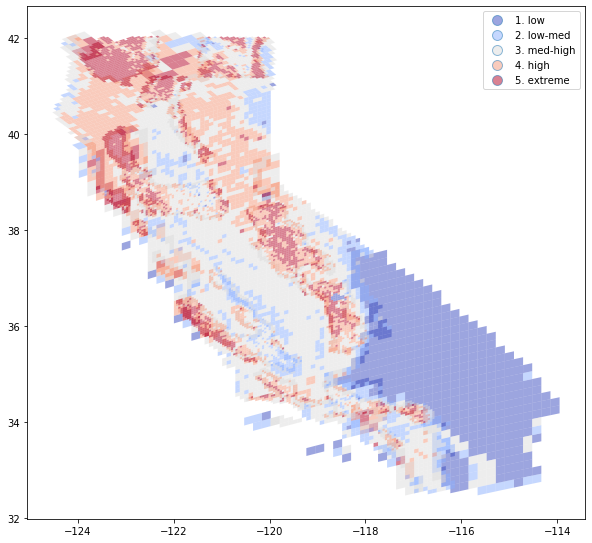

In [22]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
ax.set_facecolor('white')
camp_preds_df.plot(ax=ax, column='noprecip_cwEQ_ext_new_bins', cmap='coolwarm', legend=True, alpha=0.5)
plt.show()

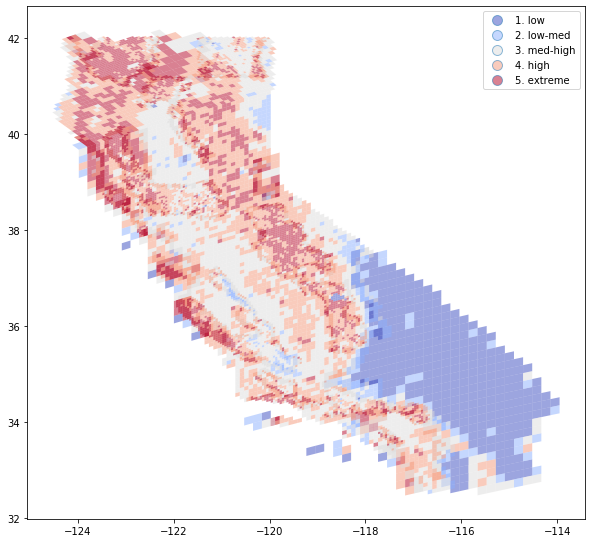

In [27]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
ax.set_facecolor('white')
camp_preds_df.plot(ax=ax, column='precip50_cwEQ_ext_new_bins', cmap='coolwarm', legend=True, alpha=0.5)
plt.show()

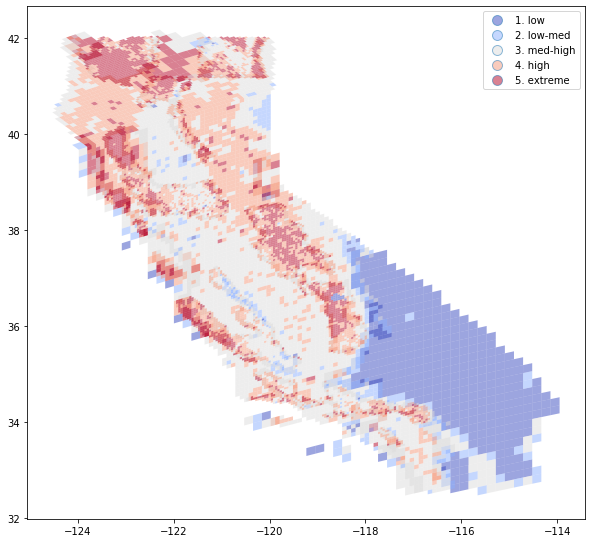

In [28]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
ax.set_facecolor('white')
camp_preds_df.plot(ax=ax, column='precip70_cwEQ_ext_new_bins', cmap='coolwarm', legend=True, alpha=0.5)
plt.show()

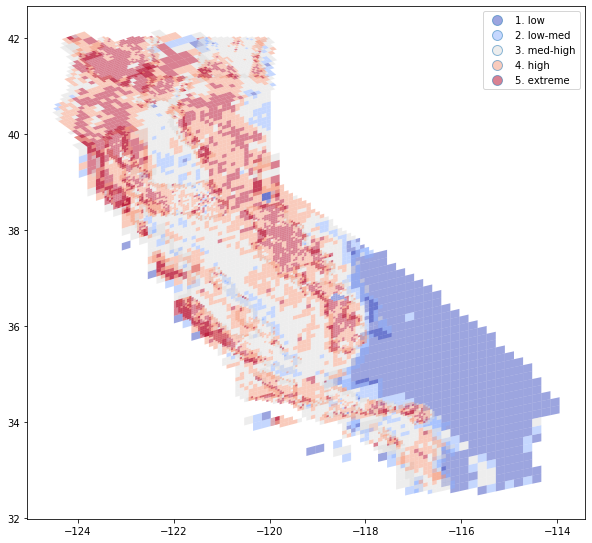

In [29]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
ax.set_facecolor('white')
camp_preds_df.plot(ax=ax, column='precip50_cwEQ_ext_other_bins', cmap='coolwarm', legend=True, alpha=0.5)
plt.show()